**Status**: Done. Got a satisfactory model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Importing the data 
Keeping the copy of the original version

In [2]:
data = pd.read_csv('heart.csv')
df = data.copy()
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [5]:
df.dtypes.value_counts()

int64      13
float64     1
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [7]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# Correlation Matrix

In [8]:
corr_mat = df.corr().apply(abs).replace(1.0,0)
corr_mat.loc[:, 'target'].sort_values(ascending = False)

oldpeak     0.438441
exang       0.438029
cp          0.434854
thalach     0.422895
ca          0.382085
slope       0.345512
thal        0.337838
sex         0.279501
age         0.229324
trestbps    0.138772
restecg     0.134468
chol        0.099966
fbs         0.041164
target      0.000000
Name: target, dtype: float64

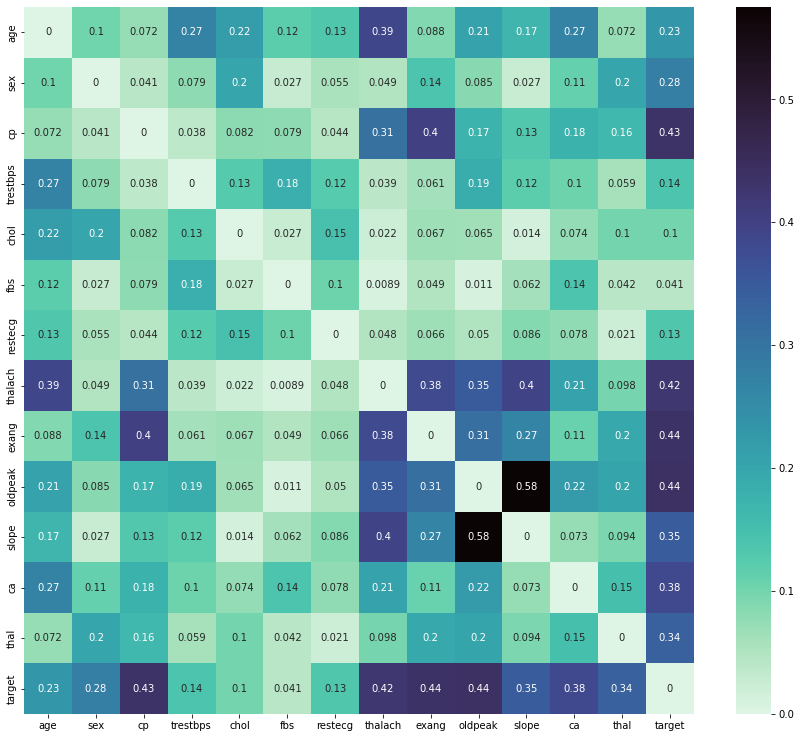

In [9]:
fig, ax = plt.subplots(figsize = (15,13))
ax = sns.heatmap(corr_mat,
                 cmap = 'mako_r',
                 annot = True)

## Looking into individual features

### Gender

In [10]:
sex_crosstab = pd.crosstab(df.sex, df.target)
sex_crosstab

target,0,1
sex,,
0,86,226
1,413,300


In [11]:
df.sex.value_counts()

1    713
0    312
Name: sex, dtype: int64

<AxesSubplot:ylabel='sex'>

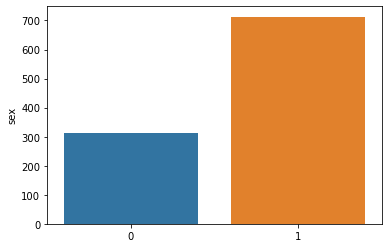

In [12]:
sns.barplot(x = df.sex.value_counts().index,
           y = df.sex.value_counts())

There is more data about male compared to female. 

In [13]:
sex_pivot = df.pivot_table(index = 'sex',
                          values = 'target',
                          aggfunc = 'count')
sex_pivot

,target
sex,
0,312
1,713


In [14]:
for i in range(2):
    for j in range(2):
        sex_crosstab.iloc[i,j] = sex_crosstab.iloc[i,j]/sex_pivot.iloc[i]

In [15]:
sex_crosstab

target,0,1
sex,,
0,0.275641,0.724359
1,0.579243,0.420757


<AxesSubplot:xlabel='sex', ylabel='1'>

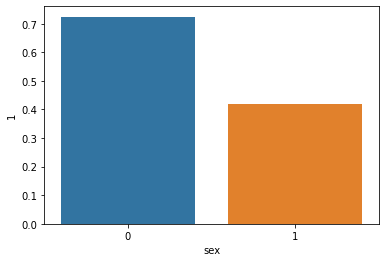

In [16]:
sns.barplot(x = sex_crosstab.index,
            y = sex_crosstab.iloc[:, 1])

Conclusion:

From relative frequency of positively tested patients, it is clear that women have more heart disease than men.

### cp/Chest Pain Type variable

<AxesSubplot:xlabel='cp', ylabel='count'>

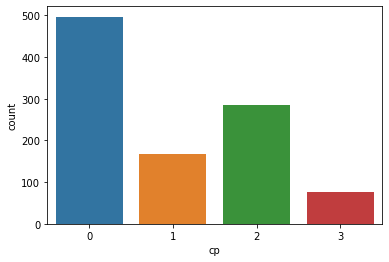

In [17]:
sns.countplot(x = df.cp)

Most of the dataset consists of patients with type 0 (Anginal Chest Pain) chest pain. 
* We want to find detect what kind of chest pain is more common among patients with heart disease

In [18]:
df.cp.unique()

array([0, 1, 2, 3])

In [19]:
df.target.unique()

array([0, 1])

In [20]:
cp_target = pd.crosstab(df.cp, df.target)
cp_target

target,0,1
cp,,
0,375,122
1,33,134
2,65,219
3,26,51


Let's find the relative frequency for each type of chest pain. Hence we can find out what type of chest pain causes 
heart disease the most.

In [21]:
cp_pivot = df.pivot_table(index = 'cp',
                          values = 'target',
                          aggfunc = 'count')
cp_pivot

,target
cp,
0,497
1,167
2,284
3,77


Now, divide the total count by 1's of those classes. Then, we'll have the relative frequency

Divide each entry in a row by the cp_pivot value in that row index

In [22]:
for i in range(4):
    for j in range(2):
        cp_target.iloc[i,j] = cp_target.iloc[i,j]/cp_pivot.iloc[i]

In [23]:
cp_target

target,0,1
cp,,
0,0.754527,0.245473
1,0.197605,0.802395
2,0.228873,0.771127
3,0.337662,0.662338


<AxesSubplot:xlabel='cp', ylabel='1'>

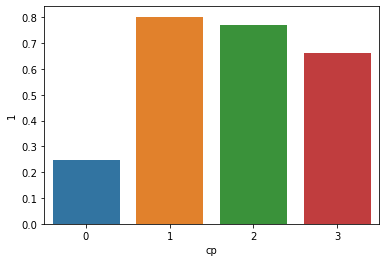

In [24]:
sns.barplot(x = cp_target.index,
            y = cp_target.iloc[:, 1])

Conclusion:
* Patients with Type 1(Atypical angina) and Type 2(Non-anginal pain) have higher chances of having heart disease.

# Trying out machine learning models
According the model selection map of sklearn, we will be trying out the following models:
![sklearn_map](ml_map.png)
1. LinearSVC
2. KNN
3. SVC
4. Random Forest
5. XGBoost

To determine, which model will perform the best, we do randomized searches for each of them. Hence, we can quickly determine which models could give the best results and do a grid search on them

## Creating Train Test splits

### Checking if the label or target is skewed or not
If it is skewed, we will use stratafied train test split, otherwise we can use the standard train test split method.

In [23]:
df.target.value_counts(normalize = True)

1    0.513171
0    0.486829
Name: target, dtype: float64

We can say that the distribution of the label is relatively normal. Hence, we use the standard train test split.

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df.drop('target', axis = 1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [26]:
y = df.target
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size = 0.2)

## Scaling the feature columns

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler = StandardScaler()

In [30]:
scaler.fit(X_train)

StandardScaler()

In [31]:
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# Import evaluation metrics
Also making a function that outputs all of them at once

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, precision_score, accuracy_score, f1_score, roc_auc_score, recall_score, plot_roc_curve, classification_report 

In [33]:
def classification_error_report_series(y_test, y_pred, model_name):
    return pd.DataFrame(data = {'accuracy_score' : accuracy_score(y_test, y_pred),
                                'recall_score' : recall_score(y_test, y_pred),
                                'f1_score' : f1_score(y_test, y_pred),
                                'roc_auc_score' : roc_auc_score(y_test, y_pred)},
                        index = [model_name])

# Trying out LinearSVC

In [34]:
from sklearn.svm import LinearSVC

In [35]:
small_values_list = list(np.linspace(0,1,10))
large_values_list = [i for i in range(2,11)]

In [36]:
small_values_list.extend(large_values_list)

In [37]:
param_grid_linearsvc = {'C': small_values_list,
             'penalty': ['l1', 'l2'],
             'max_iter': [500,1000,1500, 2000]}

In [38]:
from sklearn.model_selection import RandomizedSearchCV

In [39]:
linearsvc_cv = RandomizedSearchCV(estimator = LinearSVC(),
                                    param_distributions = param_grid_linearsvc,
                                    cv = 7,
                                    scoring = 'accuracy',
                                     n_jobs = -1)

In [40]:
linearsvc_model = linearsvc_cv.fit(X_train_s, y_train)

/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
42 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
42 fits failed with the following error:
Traceback (most recent call last):
  File "/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680

In [41]:
linearsvc_pred_test = linearsvc_model.predict(X_test)

/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LinearSVC was fitted without feature names
  warnings.warn(


In [42]:
linearsvc_report = classification_error_report_series(y_test, linearsvc_pred_test, 'LinearSVC')
linearsvc_report

,accuracy_score,recall_score,f1_score,roc_auc_score
LinearSVC,0.44878,0.025862,0.05042,0.512931


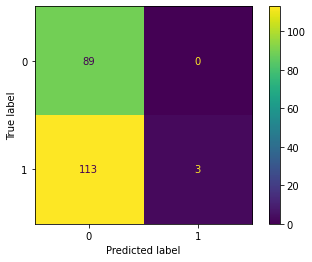

In [43]:
ConfusionMatrixDisplay.from_predictions(y_test, linearsvc_pred_test)

# KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier

In [45]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [46]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [47]:
param_grid_knn = {'n_neighbors' : [i for i in range(3,16,2)],
                 'weights': ['uniform', 'distance'],
                 'metric': ['minkowski', 'manhattan'],
                 'p': [1,2],
                 'leaf_size': np.linspace(10,100,10)}

In [48]:
knn_cv = RandomizedSearchCV(KNeighborsClassifier(),
                     param_distributions = param_grid_knn,
                     cv = 5,
                     n_jobs = -1)

In [49]:
knn_model = knn_cv.fit(X_train_s, y_train)

In [50]:
knn_pred_test = knn_model.predict(X_test_s)

In [51]:
knn_report = classification_error_report_series(y_test, knn_pred_test, 'KNN_accuracy')
knn_report

,accuracy_score,recall_score,f1_score,roc_auc_score
KNN_accuracy,0.985366,0.974138,0.9869,0.987069


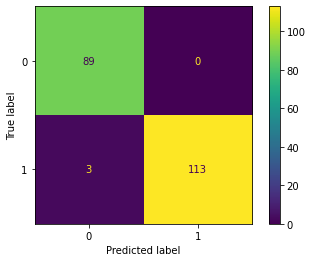

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred_test)

# SVC

In [53]:
from sklearn.svm import SVC

In [54]:
param_grid_svc = {'C': [0.1,1, 10, 100],
                  'gamma': [1,0.1,0.01,0.001],
                  'kernel': ['rbf', 'poly', 'sigmoid'],
                 'degree': [i for i in range(2,10,1)]}

In [55]:
svc_cv = RandomizedSearchCV(SVC(),
                           param_distributions = param_grid_svc,
                           cv = 5,
                           n_jobs = -1)

In [56]:
svc_model = svc_cv.fit(X_train_s, y_train)

In [57]:
svc_pred_test = svc_model.predict(X_test_s)

In [58]:
svc_report = classification_error_report_series(y_test, svc_pred_test, 'SVC_accuracy')
svc_report

,accuracy_score,recall_score,f1_score,roc_auc_score
SVC_accuracy,0.985366,0.974138,0.9869,0.987069


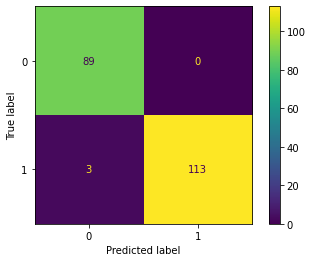

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_pred_test)

# Random Forest VS Extra Trees Classifier

In [60]:
from sklearn.ensemble import RandomForestClassifier

In [61]:
RF = RandomForestClassifier(oob_score=True, 
                            warm_start=True,
                            n_jobs=-1)

oob_list = []

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    RF.set_params(n_estimators=n_trees)
    RF.fit(X_train, y_train)
    oob_error = 1 - RF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

rf_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

rf_oob_df

/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.014634
20.0,0.006098
30.0,0.004878
40.0,0.006098
50.0,0.006098
100.0,0.004878
150.0,0.003659
200.0,0.003659
300.0,0.003659


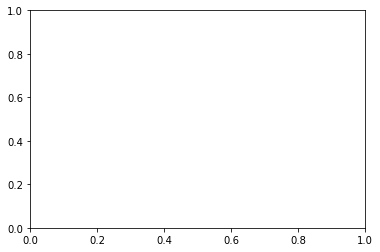

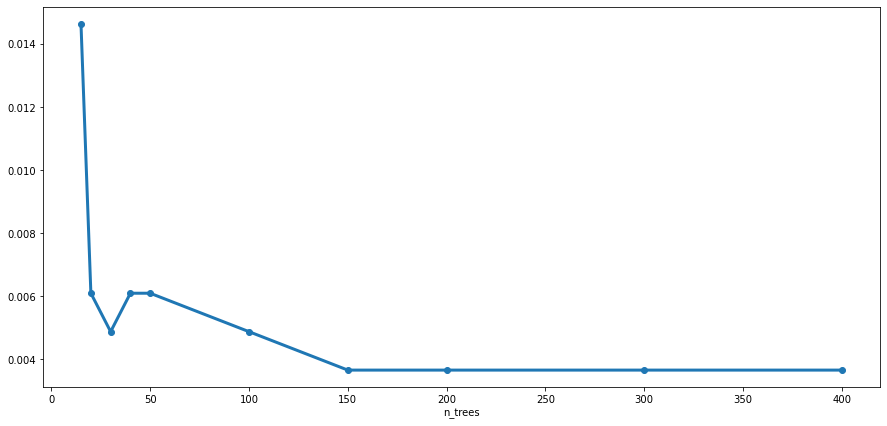

In [62]:
fig, ax = plt.subplots()
ax = rf_oob_df.plot(legend=False,
                    marker='o',
                    figsize=(15, 7),
                    linewidth = 3)

In [63]:
from sklearn.ensemble import ExtraTreesClassifier

In [64]:
EF = ExtraTreesClassifier(oob_score=True, 
                          warm_start=True,
                          bootstrap=True,
                          n_jobs=-1)

oob_list = list()

for n_trees in [15, 20, 30, 40, 50, 100, 150, 200, 300, 400]:
    EF.set_params(n_estimators=n_trees)
    EF.fit(X_train, y_train)
    oob_error = 1 - EF.oob_score_
    oob_list.append(pd.Series({'n_trees': n_trees, 'oob': oob_error}))

et_oob_df = pd.concat(oob_list, axis=1).T.set_index('n_trees')

et_oob_df

/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


,oob
n_trees,
15.0,0.015854
20.0,0.012195
30.0,0.008537
40.0,0.003659
50.0,0.003659
100.0,0.002439
150.0,0.004878
200.0,0.003659
300.0,0.002439


In [65]:
oob_df = pd.concat([rf_oob_df.rename(columns={'oob':'RandomForest'}),
                    et_oob_df.rename(columns={'oob':'ExtraTrees'})], axis=1)

oob_df

,RandomForest,ExtraTrees
n_trees,,
15.0,0.014634,0.015854
20.0,0.006098,0.012195
30.0,0.004878,0.008537
40.0,0.006098,0.003659
50.0,0.006098,0.003659
100.0,0.004878,0.002439
150.0,0.003659,0.004878
200.0,0.003659,0.003659
300.0,0.003659,0.002439


<AxesSubplot:xlabel='n_trees'>

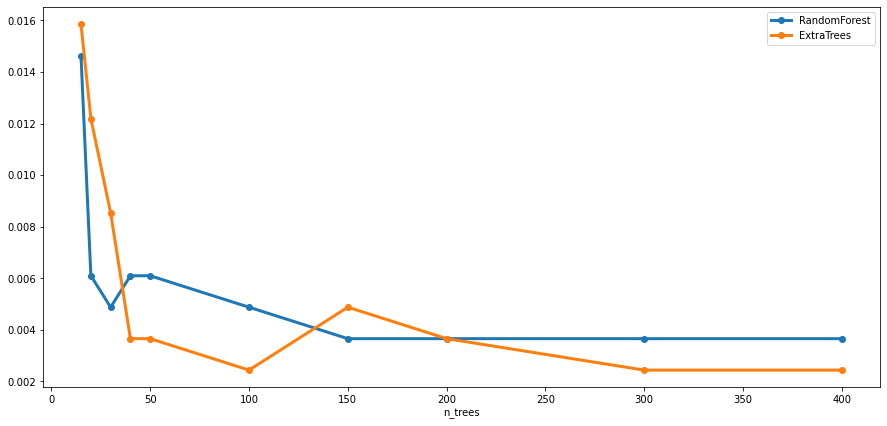

In [66]:
oob_df.plot(figsize = (15,7),
           linewidth = 3,
           legend = True,
           marker = 'o')

In [67]:
n_trees = [50,75,250,300,100]

It is noticable that Extra Trees Classifier is performing better

In [68]:
ExtraTreesClassifier().get_params().keys()

dict_keys(['bootstrap', 'ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'max_samples', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_jobs', 'oob_score', 'random_state', 'verbose', 'warm_start'])

In [78]:
param_grid_etc = {
'n_estimators': n_trees,
'max_samples' : np.linspace(0.0,1.0,10),
'min_samples_split' : np.linspace(0.0,1.0,10),
'min_samples_leaf' : np.linspace(0.0,1.0,10),
}

In [82]:
etc_cv = RandomizedSearchCV(ExtraTreesClassifier(bootstrap = True),
                           param_distributions = param_grid_etc,
                           cv = 5,
                           n_jobs = -1)

In [83]:
etc_model = etc_cv.fit(X_train, y_train)

/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/apricot/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py", line 450, in fit
    trees = Parallel(
  File "/home/apricot/anaconda3/lib/python3.9/site-packages/joblib/parallel.py", line 1043, in __call__
    if self.dispatch_one_batch(iterator):
  File "/home/apri

In [84]:
etc_pred_test = etc_model.predict(X_test)

In [85]:
etc_report = classification_error_report_series(y_test, etc_pred_test, 'ExtraTreesClassifier_accuracy')
etc_report

,accuracy_score,recall_score,f1_score,roc_auc_score
ExtraTreesClassifier_accuracy,0.82439,0.775862,0.833333,0.831751


In [86]:
etc_model.best_params_

{'n_estimators': 300,
 'min_samples_split': 0.4444444444444444,
 'min_samples_leaf': 0.2222222222222222,
 'max_samples': 1.0}

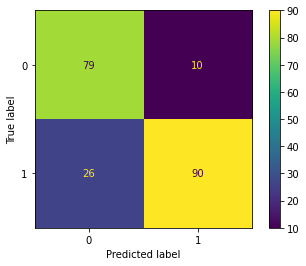

In [87]:
ConfusionMatrixDisplay.from_predictions(y_test, etc_pred_test)

# XGBoost

In [88]:
from xgboost import XGBClassifier

In [89]:
param_grid_xgbc = {'gamma': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4, 200],
              'learning_rate': [0.01, 0.03, 0.06, 0.1, 0.15, 0.2, 0.25, 0.300000012, 0.4, 0.5, 0.6, 0.7],
              'max_depth': [5,6,7,8,9,10,11,12,13,14],
              'n_estimators': [50,65,80,100,115,130,150],
              'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
              'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200]}

In [90]:
xgbc_cv = RandomizedSearchCV(XGBClassifier(),
                            param_distributions = param_grid_xgbc,
                            cv = 5,
                            n_jobs = -1)

In [91]:
xgbc_model = xgbc_cv.fit(X_train, y_train)

In [92]:
xgbc_pred_test = xgbc_model.predict(X_test)

In [93]:
xgbc_report = classification_error_report_series(y_test, xgbc_pred_test, 'XGBoost_accuracy')
xgbc_report

,accuracy_score,recall_score,f1_score,roc_auc_score
XGBoost_accuracy,1.0,1.0,1.0,1.0


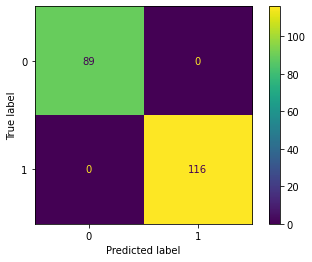

In [94]:
ConfusionMatrixDisplay.from_predictions(y_test, xgbc_pred_test)

In [95]:
pd.concat([xgbc_report, etc_report, linearsvc_report, svc_report, knn_report]).sort_values('accuracy_score',
                                                                                          ascending = False)

,accuracy_score,recall_score,f1_score,roc_auc_score
XGBoost_accuracy,1.000000,1.000000,1.000000,1.000000
SVC_accuracy,0.985366,0.974138,0.986900,0.987069
KNN_accuracy,0.985366,0.974138,0.986900,0.987069
ExtraTreesClassifier_accuracy,0.824390,0.775862,0.833333,0.831751
LinearSVC,0.448780,0.025862,0.050420,0.512931


In [96]:
xgbc_model.best_params_

{'reg_lambda': 0.8,
 'reg_alpha': 0,
 'n_estimators': 150,
 'max_depth': 12,
 'learning_rate': 0.7,
 'gamma': 0}

# Evaluating with cross validation

In [99]:
from sklearn.model_selection import cross_val_score

clf = XGBClassifier(reg_lambda= 0.8,
                    reg_alpha= 0,
                    n_estimators= 150,
                    max_depth= 12,
                    learning_rate= 0.7,
                    gamma= 0)

In [100]:
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5, 
                         scoring="accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.9931707317073171

Yes! Great Success! 

The model required to have an accuracy of over 95%. We have achieved far better than that.

## Saving the model

In [101]:
import joblib
joblib.dump(xgbc_model, 'xgbc_model.sav')

['xgbc_model.sav']